Unsupervised Learning

K-Means Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/D14data1.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#Input data
X = dataset.iloc[:,[3,4]].values

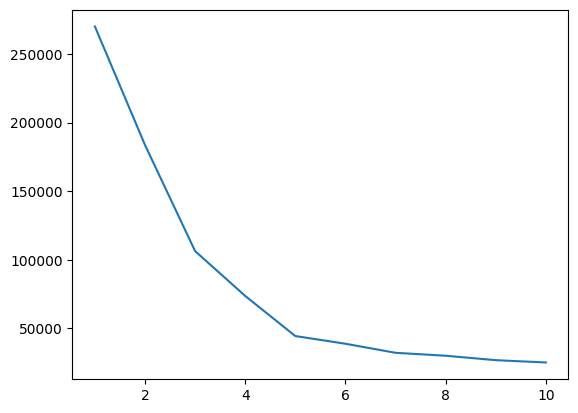

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeeans = KMeans(n_clusters=i, init='k-means++',random_state=41)
  kmeeans.fit(X)
  wcss.append(kmeeans.inertia_)
plt.plot(range(1,11),wcss)

In [9]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [10]:
y_kmeans =kmeans.fit_predict(X)
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

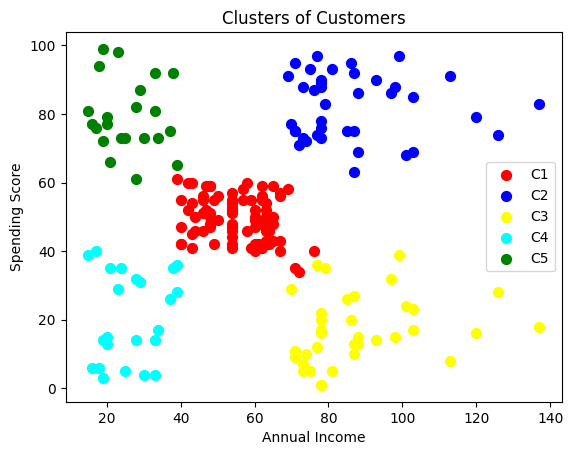

In [18]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s=50, c='red', label = 'C1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s=50, c='blue', label = 'C2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s=50, c='yellow', label = 'C3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s=50, c='cyan', label = 'C4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s=50, c='green', label = 'C5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Hierarchical Algorithm

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataset = pd.read_csv('/content/D14data1.csv')
dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
#Input Data
X = dataset.iloc[:,[3,4]].values

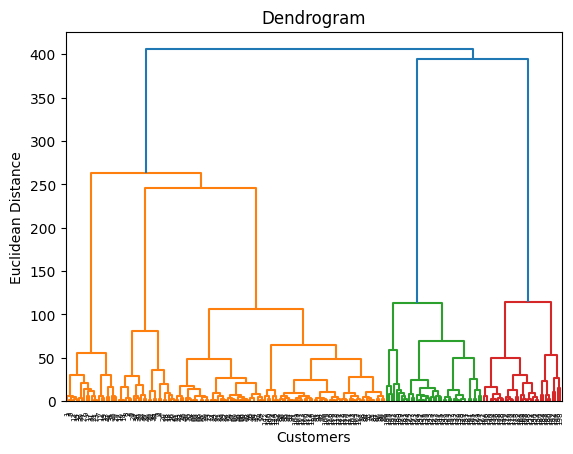

In [23]:
#Hierarchical algo
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

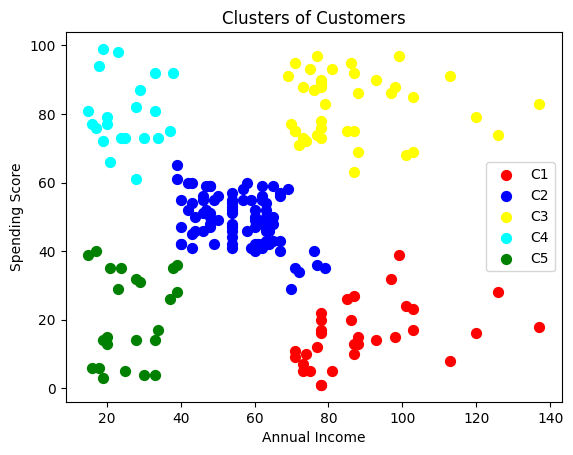

In [26]:
plt.scatter(X[y_hc == 0,0],X[y_hc == 0,1], s=50, c='red', label = 'C1')
plt.scatter(X[y_hc == 1,0],X[y_hc == 1,1], s=50, c='blue', label = 'C2')
plt.scatter(X[y_hc == 2,0],X[y_hc == 2,1], s=50, c='yellow', label = 'C3')
plt.scatter(X[y_hc == 3,0],X[y_hc == 3,1], s=50, c='cyan', label = 'C4')
plt.scatter(X[y_hc == 4,0],X[y_hc == 4,1], s=50, c='green', label = 'C5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

DBSCAN Algorithm

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
dataset = pd.DataFrame(np.load('/content/D14data2 .npy'), columns=['X','y'])
dataset

,X,y
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075
...,...,...
2304,-0.063610,0.013804
2305,0.284742,0.301998
2306,0.502431,-0.300296
2307,0.538223,0.194122


<Axes: xlabel='X', ylabel='y'>

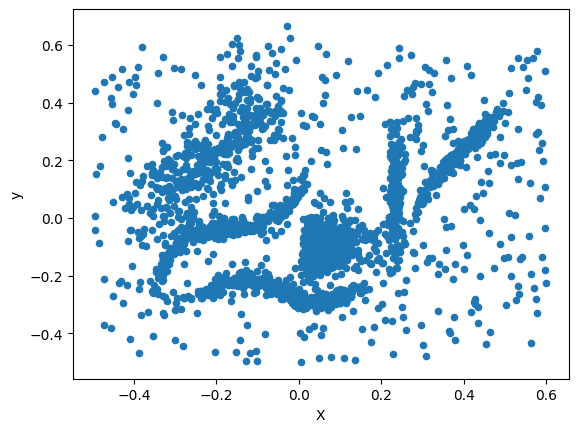

In [29]:
dataset.plot(kind='scatter', x='X', y='y')

In [30]:
from sklearn.cluster import DBSCAN
dbscan =DBSCAN(eps=0.033, min_samples=22, algorithm='brute', p=0.9)
y_dbscan = dbscan.fit_predict(dataset)


In [32]:
la = dbscan.labels_
la

array([ 0,  0,  0, ..., -1, -1,  0])

In [33]:
len(dbscan.core_sample_indices_)

1364

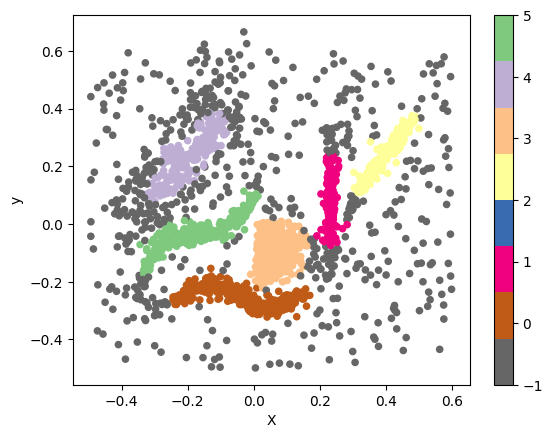

In [34]:
dataset.plot(kind='scatter',x='X', y='y', c=y_dbscan, cmap='Accent_r')
plt.show()

Spectral Clustering

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

In [36]:
X, y =make_moons(n_samples=300, noise=0.05, random_state=41)

In [37]:
#Apply spectral modelling
spectral_model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=41)
labels = spectral_model.fit(X)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


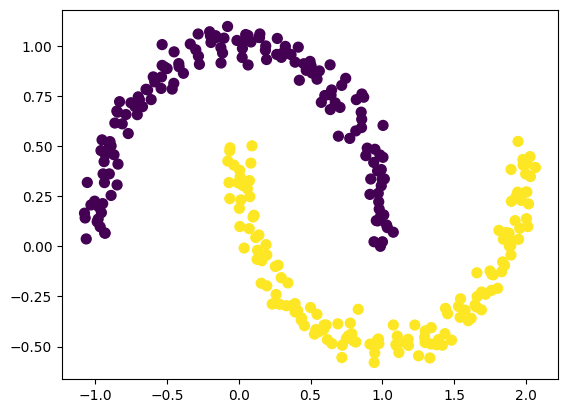

In [39]:
plt.scatter(X[:,0],X[:,1], c=labels.labels_, cmap='viridis', s=50)
plt.show()

Spectral clustering for iris dataset

In [40]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

In [41]:
data = load_iris()
X = data.data
y = data.target

In [42]:
#Feature scaling
sc =StandardScaler()
X = sc.fit_transform(X)

In [43]:
spectral_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=41)
labels = spectral_model.fit_predict(X)

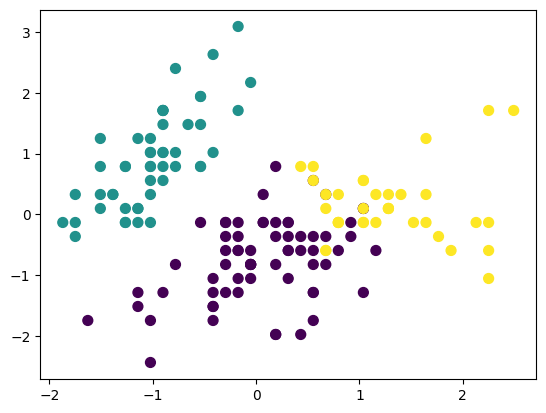

In [44]:
plt.scatter(X[:,0],X[:,1], c=labels, cmap='viridis', s=50)
plt.show()

PCA Algorithm

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [47]:
data = load_iris()
X = data.data
y = data.target_names

In [48]:
#Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [49]:
#Apply PCA
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)

In [50]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

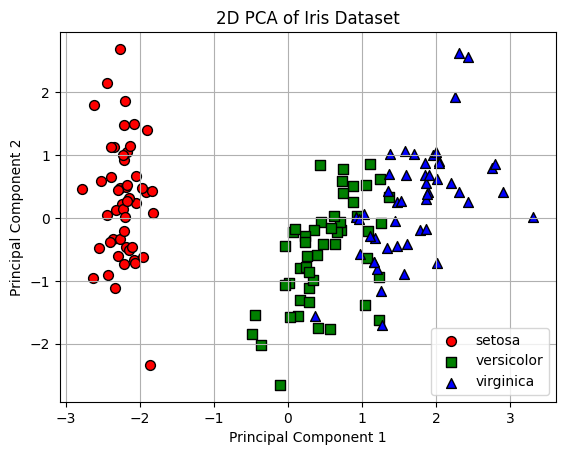

In [59]:
#2D plot
# Reload the iris dataset to access numerical target labels for indexing
from sklearn.datasets import load_iris
data_iris_reloaded = load_iris()
y_numeric = data_iris_reloaded.target

markers =['o','s','^']
colors =['r','g','b']

for i in range(3):
  plt.scatter(
      X_pca2[y_numeric==i, 0], X_pca2[y_numeric==i, 1], c=colors[i], marker=markers[i], label=y[i], s=50, edgecolors='k'
  )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

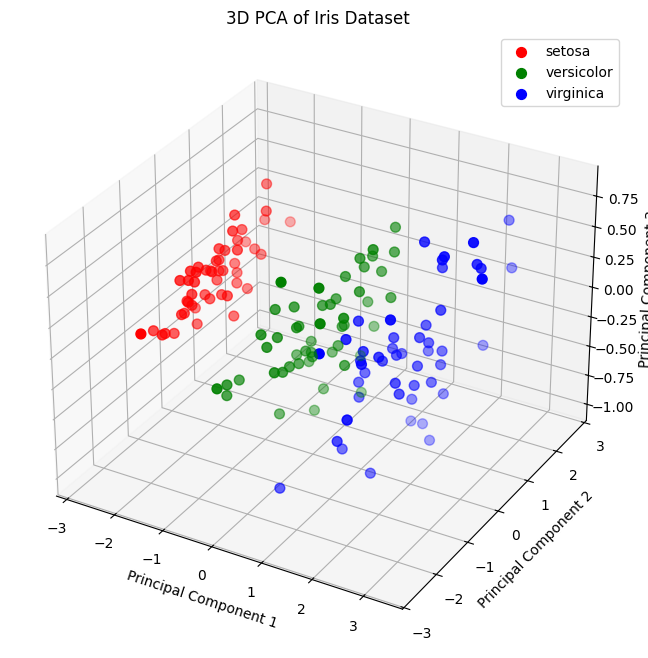

In [61]:
##3D Visualization

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, color in zip(range(3), ['red','green','blue']):
  ax.scatter(
      X_pca3[y_numeric==i, 0],
      X_pca3[y_numeric==i, 1],
      X_pca3[y_numeric==i, 2],
      c=color, label=y[i], s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Iris Dataset')
ax.legend()
plt.show()